In [2]:
!pip3 install polars duckdb


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import polars as pl
import duckdb

df = pl.read_csv("datasets/e_commerce/Fraud_Data.csv")
duckdb.sql("SELECT * FROM df limit 5;")

┌─────────┬─────────────────────┬─────────────────────┬───┬─────────┬───────┬──────────────────┬───────┐
│ user_id │     signup_time     │    purchase_time    │ … │   sex   │  age  │    ip_address    │ class │
│  int64  │       varchar       │       varchar       │   │ varchar │ int64 │      double      │ int64 │
├─────────┼─────────────────────┼─────────────────────┼───┼─────────┼───────┼──────────────────┼───────┤
│   22058 │ 2015-02-24 22:55:49 │ 2015-04-18 02:47:11 │ … │ M       │    39 │  732758368.79972 │     0 │
│  333320 │ 2015-06-07 20:39:50 │ 2015-06-08 01:38:54 │ … │ F       │    53 │ 350311387.865908 │     0 │
│    1359 │ 2015-01-01 18:52:44 │ 2015-01-01 18:52:45 │ … │ M       │    53 │ 2621473820.11095 │     1 │
│  150084 │ 2015-04-28 21:13:25 │ 2015-05-04 13:54:50 │ … │ M       │    41 │ 3840542443.91396 │     0 │
│  221365 │ 2015-07-21 07:09:52 │ 2015-09-09 18:40:53 │ … │ M       │    45 │ 415583117.452712 │     0 │
├─────────┴─────────────────────┴─────────────────────┴

In [36]:
q = """
        SELECT 
                COUNT(*) AS USER_COUNTS, USER_ID 
        FROM df 
        GROUP BY USER_ID 
        ORDER BY USER_COUNTS DESC
"""

duckdb.sql(q)

┌──────────────┬─────────┐
│ USER_COUNTS  │ user_id │
│    int64     │  int64  │
├──────────────┼─────────┤
│            1 │  303560 │
│            1 │  169109 │
│            1 │  256364 │
│            1 │   63362 │
│            1 │  254720 │
│            1 │  262086 │
│            1 │  106196 │
│            1 │  355160 │
│            1 │  178064 │
│            1 │  205236 │
│            · │     ·   │
│            · │     ·   │
│            · │     ·   │
│            1 │  161517 │
│            1 │  230887 │
│            1 │  129380 │
│            1 │   17059 │
│            1 │  326097 │
│            1 │  143642 │
│            1 │  105995 │
│            1 │  109501 │
│            1 │  253414 │
│            1 │   15839 │
├──────────────┴─────────┤
│ ? rows       2 columns │
└────────────────────────┘

In [37]:
df["class"].value_counts()

class,count
i64,u32
1,14151
0,136961


In [38]:
df["class"].mean() * 100

9.364577267192546

In [39]:
df.dtypes

[Int64,
 String,
 String,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 Float64,
 Int64]

In [40]:
for each in zip(df.columns, df.dtypes):
    if each[1] == pl.String:
        print(each)

('signup_time', String)
('purchase_time', String)
('device_id', String)
('source', String)
('browser', String)
('sex', String)


In [41]:
q = """
        SELECT 
                COUNT(*) AS DEVICE_COUNTS, DEVICE_ID 
        FROM df 
        GROUP BY DEVICE_ID 
        ORDER BY DEVICE_COUNTS DESC
"""

q = """
        SELECT 
                COUNT(*) AS DEVICE_COUNTS, DEVICE_ID 
        FROM df 
        GROUP BY DEVICE_ID 
        ORDER BY DEVICE_COUNTS DESC
"""

duckdb.sql(q)

┌───────────────┬───────────────┐
│ DEVICE_COUNTS │   device_id   │
│     int64     │    varchar    │
├───────────────┼───────────────┤
│            20 │ CQTUVBYIWWWBC │
│            20 │ NGQCKIADMZORL │
│            20 │ KIPFSCNUGOLDP │
│            20 │ ZUSVMDEZRBDTX │
│            20 │ EQYVNEGOFLAWK │
│            20 │ ITUMJCKWEYNDD │
│            19 │ EGLGSEGYPMMAM │
│            19 │ BWSMVSLCJXMCM │
│            19 │ IGKYVZDBEGALB │
│            19 │ CDFXVYHOIHPYP │
│             · │       ·       │
│             · │       ·       │
│             · │       ·       │
│             1 │ NNAGIAPXIQNVD │
│             1 │ ZIOVXESXIVOBV │
│             1 │ YEPXREHDBQVPR │
│             1 │ OGQDIJWHFLYLT │
│             1 │ WCWEOXMMANLNI │
│             1 │ DNOSDXPZIMNNF │
│             1 │ JNHZCPPGBGYST │
│             1 │ DDFMKTIHGNJUL │
│             1 │ VEWKBNVJMZZKF │
│             1 │ UZJNXVWEFDKGL │
├───────────────┴───────────────┤
│ ? rows (>9999 rows, 20 shown) │
└─────────────

In [42]:
len(df["device_id"].unique())

137956

In [43]:
len(df)

151112

In [44]:
!pip3 install category_encoders


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip


In [45]:
from datetime import datetime


time_transformed_df = df.with_columns(
    pl.col("user_id").cast(str).alias("user_id"),
    pl.col("ip_address").cast(str).alias("ip_address"),
    df["signup_time"].str.to_datetime().dt.year().alias("signup_year"),
    df["signup_time"].str.to_datetime().dt.month().alias("signup_month"),
    df["signup_time"].str.to_datetime().dt.day().alias("signup_day"),
    df["purchase_time"].str.to_datetime().dt.year().alias("purchase_year"),
    df["purchase_time"].str.to_datetime().dt.month().alias("purchase_month"),
    df["purchase_time"].str.to_datetime().dt.day().alias("purchase_day"),
).drop(["signup_time", "purchase_time"])

In [46]:
for each in zip(time_transformed_df.columns, time_transformed_df.dtypes):
    if each[1] == pl.String:
        print(each)

('user_id', String)
('device_id', String)
('source', String)
('browser', String)
('sex', String)
('ip_address', String)


In [47]:
from category_encoders import CatBoostEncoder
from sklearn.ensemble import IsolationForest

enc = CatBoostEncoder()
y = df["class"]
x = enc.fit_transform(
    time_transformed_df.drop("class").to_pandas(),
    time_transformed_df["class"].to_pandas(),
)

In [48]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(x)

IsolationForest()

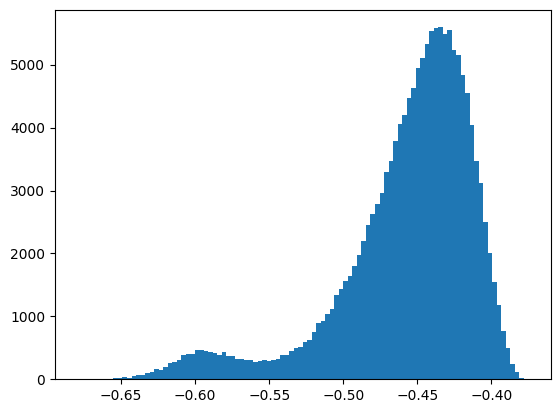

In [49]:
import matplotlib.pyplot as plt

plt.hist(model.score_samples(x), bins=100)
plt.show()

In [50]:
import numpy as np

preds = np.where((model.predict(x) == -1), 1, 0)
trues = np.where(y == 1, 0, 1)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score

# confusion_matrix(preds, y)
accuracy_score(y, preds)

average_precision_score(y, preds)  # AUPRC is 27.

0.26525920600545744

In [52]:
### Without contamination , we see that the fraud rate is 15%. Accuracy should be high but is so low.  ?

preds.mean()  # Fraud rate predicted by auto contamination.

0.13730213351686166

In [53]:
x.drop("outlier", axis=1, inplace=True)

KeyError: "['outlier'] not found in axis"

In [54]:
### Comparing to a supervised classification model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(class_weight={0: 1, 1: 90})

train_x, test_x, train_y, test_y = train_test_split(x.to_numpy(), y.to_numpy())
rf.fit(train_x, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 90})

In [55]:
rf.predict(test_x).mean()  # 5 percent fraud rate.

0.05225263380803642

In [26]:
average_precision_score(test_y, rf.predict(test_x))
# High precision at 0.5 itself.

NameError: name 'test_y' is not defined

### Way higher Average Precision Score when training supervised classification models 

In [56]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

pip_lasso = Pipeline([("standardscaler", StandardScaler()), 
                      ("lasso", LassoCV())])

pip_lasso.fit(train_x, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', LassoCV())])

In [57]:
import pandas as pd

dict(zip(x.columns, pip_lasso.steps[-1][1].coef_))

{'user_id': 0.0,
 'purchase_value': 0.0,
 'device_id': 0.03470223726348215,
 'source': 0.005923897842251137,
 'browser': 0.0016189321169317794,
 'sex': 0.0039302366103953655,
 'age': 9.407021052541005e-05,
 'ip_address': 0.13511148393353667,
 'signup_year': 0.0,
 'signup_month': 0.022658246359700516,
 'signup_day': -0.003942633529204507,
 'purchase_year': 0.0,
 'purchase_month': -0.040059991887440215,
 'purchase_day': -0.015038681556970098}

In [58]:
preds = pip_lasso.predict(test_x)

average_precision_score(test_y, preds)  # AUPRC is 27.

0.583391215945301

In [59]:
pip_lasso.steps[-1][1].alpha_

0.00018135674448499007

In [60]:
plt.plot((model.alphas_))

AttributeError: 'IsolationForest' object has no attribute 'alphas_'

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

lo = LocalOutlierFactor(contamination=0.1)
iso = IsolationForest(contamination=0.1)

lofs = lo.fit_predict(x)
isos = iso.fit_predict(x)

In [ ]:
pd.Series(lo.fit_predict(x)).value_counts()

In [ ]:
confusion_matrix(lofs,isos)

In [ ]:
!cp ~/Downloads/

In [2]:
import pandas as pd
import scipy.io

mat = scipy.io.loadmat('datasets/amazon.mat')


ffsd = pd.read_csv('datasets/S-FFSD.csv')

In [3]:
ffsd['Labels'].value_counts()

Labels
2    48238
0    24387
1     5256
Name: count, dtype: int64

In [4]:
np.unique(mat['label'],return_counts= True)

NameError: name 'np' is not defined

In [5]:
mat['net_upu']

<11944x11944 sparse matrix of type '<class 'numpy.float64'>'
	with 351216 stored elements in Compressed Sparse Column format>

In [6]:
###  For semi supervised learning, can we build a neural network in Pytorch Geometric using GATED RECURRING UNITS to be able to implement state of the art solutions?

mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 19 20:20:49 2020',
 '__version__': '1.0',
 '__globals__': [],
 'homo': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 8796784 stored elements in Compressed Sparse Column format>,
 'net_upu': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 351216 stored elements in Compressed Sparse Column format>,
 'net_usu': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 7132958 stored elements in Compressed Sparse Column format>,
 'net_uvu': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 2073474 stored elements in Compressed Sparse Column format>,
 'features': <11944x25 sparse matrix of type '<class 'numpy.float64'>'
 	with 174488 stored elements in Compressed Sparse Column format>,
 'label': array([[0., 0., 0., ..., 0., 0., 0.]])}

In [7]:
mat['features'].todense()

matrix([[ 1. , 26. ,  0. , ...,  1. , 13. ,  1. ],
        [ 4. , 17. ,  0. , ...,  0. , 45. ,  1. ],
        [ 2. , 15. ,  0. , ...,  1. , 24.5,  1. ],
        ...,
        [ 1. , 10. ,  0. , ...,  1. , 15. ,  1. ],
        [ 1. , 10. ,  0. , ...,  1. , 88. ,  1. ],
        [ 1. , 10. ,  0. , ...,  1. , 31. ,  1. ]])

In [8]:
mat['homo']

<11944x11944 sparse matrix of type '<class 'numpy.float64'>'
	with 8796784 stored elements in Compressed Sparse Column format>

In [9]:
ffsd

,Time,Source,Target,Amount,Location,Type,Labels
0,0,S10000,T1000,13.74,L100,TP100,2
1,1,S10001,T1001,73.17,L101,TP101,2
2,2,S10002,T1000,68.59,L100,TP100,2
3,3,S10003,T1002,57.00,L100,TP102,2
4,4,S10004,T1000,11.55,L100,TP100,2
...,...,...,...,...,...,...,...
77876,77876,S40343,T1807,4.00,L100,TP118,2
77877,77877,S24768,T1110,218.00,L110,TP126,2
77878,77878,S40344,T1068,90.00,L100,TP107,2
77879,77879,S40345,T1037,7.00,L100,TP126,2


In [10]:
np.argwhere(mat['homo'].toarray()).max()

NameError: name 'np' is not defined

In [11]:
mat['features'].toarray().shape[0]

11944

In [12]:
mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 19 20:20:49 2020',
 '__version__': '1.0',
 '__globals__': [],
 'homo': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 8796784 stored elements in Compressed Sparse Column format>,
 'net_upu': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 351216 stored elements in Compressed Sparse Column format>,
 'net_usu': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 7132958 stored elements in Compressed Sparse Column format>,
 'net_uvu': <11944x11944 sparse matrix of type '<class 'numpy.float64'>'
 	with 2073474 stored elements in Compressed Sparse Column format>,
 'features': <11944x25 sparse matrix of type '<class 'numpy.float64'>'
 	with 174488 stored elements in Compressed Sparse Column format>,
 'label': array([[0., 0., 0., ..., 0., 0., 0.]])}

In [21]:
import torch
from torch_geometric.nn.models import GraphSAGE
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import numpy as np


coo_matrix = mat['homo'].tocoo()
i = torch.LongTensor(np.vstack((coo_matrix.row, coo_matrix.col)))

data = Data(
                x = torch.FloatTensor(mat['features'].todense()),
                #edge_index = i.contiguous(),
                y = torch.IntTensor(mat['label']).reshape(-1,1)
            )


loader = DataLoader(data, shuffle= True)

data.validate(raise_on_error= True)
data[0]

{} _cached_attr
{'x': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]])} _cached_attr
{'x': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]]), 'y': tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
      

KeyError: 0

In [22]:
for batch in loader:
    batch
    break

{'x': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]]), 'y': tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=torch.int32)} __getitems__
{'x': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000, 

KeyError: 0

In [80]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphSAGE

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GraphSAGE(25, 16, num_layers= 10) # 
        self.conv2 = GraphSAGE(16, 1, num_layers= 10)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.sigmoid(x)

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.binary_cross_entropy(out, data.y.unsqueeze(-1))
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(loss)

AttributeError: 'IsolationForest' object has no attribute 'parameters'

In [ ]:
!pip3 install jax

In [ ]:
import jax.numpy as jnumpy 
from jax import grad

In [ ]:
jnumpy.zeros(10)

In [ ]:
from jax import grad

def square(x):
    return x**2

grad(square)(7.)

In [ ]:
import jax 

jax.Array((y.to_numpy()))

In [727]:
jnp.array

In [ ]:
### Quick Logistic Regression in  JAX? 

import jax.numpy as jnp 

y = df["class"]
x = enc.fit_transform(
    time_transformed_df.drop("class").to_pandas(),
    time_transformed_df["class"].to_pandas(),
)


w = jnp.array(jnp.array)
b = jnp.array(np.random.randn(1))

def forward(w, b, x):
    ords = w @ x + b
    return 1. /  (1 + jnp.exp(-ords))   

# Training loss is the negative log-likelihood of the training examples.
def loss(W, b, x):
    preds = forward(W, b, x)
    label_probs = preds * y + (1 - preds) * (1 - y)
    return -jnp.sum(jnp.log(label_probs))

grad(loss)(w,b,x)

In [32]:
%load_ext unsupervised
from unsupervised.anomaly import ForestBased

model = ForestBased()

The unsupervised module is not an IPython extension.


In [34]:
model.fit(x,y)

AttributeError: 'ForestBased' object has no attribute 'model_map'

In [35]:
!pip3 install hypothesis 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 kB 9.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip


In [18]:
list(range(5,0,1))

[]

In [19]:
d = {1:2,
 3:-1}

In [20]:
d.sort()

AttributeError: 'dict' object has no attribute 'sort'